# 15 July 2022: US Destinations, Part II
At this point we're ready to visualize the destinations of Knoedler's US sales. We'll start with our standard imports and then load our Knoedler dataset.

In [1]:
# Standard imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Import cleaned dataset
knoedler = pd.read_csv('../data/knoedler_clean.csv')

# Get buyer location info value counts and create DataFrame to use
buyer_locs = pd.Series(knoedler['buy_auth_loc_1_single'].value_counts())
buyer_locs_count = pd.DataFrame(data={
    'city':buyer_locs.index,
    'count':buyer_locs.values
})

buyer_locs_count

/var/folders/_h/vtjqyqq96hv8fw2d_ybkq1sc0000gn/T/ipykernel_3816/1025456660.py:10: DtypeWarning: Columns (5,6,7,43,44,47,52,53,54,56,57,58,70,75,76,77,79,80,81,84,92) have mixed types. Specify dtype option on import or set low_memory=False.
  knoedler = pd.read_csv('../data/knoedler_clean.csv')


,city,count
0,"New York, NY, USA",10803
1,"London, England, UK",2153
2,"Philadelphia, PA, USA",1347
3,"Paris, France",1194
4,"Boston, MA, USA",1132
...,...,...
807,"Botesdale, Norfolk, England, UK",1
808,"Ligonier, PA, USA",1
809,"Delaplane, VA, USA",1
810,"Red Bank, NJ, USA",1


Next, let's load the dataset we created in the previous journal, which contains coordinates for all US buyer locations that number at least five.

In [2]:
# Import US buyer location dataset
buyer_coords_us = pd.read_csv('../data/knoedler_buyer_locs_us.csv', index_col=0)

buyer_coords_us

,city,location,coords
0,"New York, NY, USA","City of New York, New York, United States","(40.7127281, -74.0060152, 0.0)"
1,"Philadelphia, PA, USA","Philadelphia, Philadelphia County, Pennsylvani...","(39.9527237, -75.1635262, 0.0)"
2,"Boston, MA, USA","Boston, Suffolk County, Massachusetts, United ...","(42.3554334, -71.060511, 0.0)"
3,"Chicago, IL, USA","Chicago, Cook County, Illinois, United States","(41.8755616, -87.6244212, 0.0)"
4,"Brooklyn, NY, USA","Brooklyn, Kings County, City of New York, New ...","(40.6526006, -73.9497211, 0.0)"
...,...,...,...
203,"New Canaan, CT, USA","New Canaan, Fairfield County, Connecticut, 068...","(41.146763, -73.4948446, 0.0)"
204,"Duluth, MN, USA","Duluth, Saint Louis County, Minnesota, United ...","(46.7729322, -92.1251218, 0.0)"
205,"Pomfret, CT, USA","Pomfret, Windham County, Connecticut, United S...","(41.8975977, -71.9625736, 0.0)"
206,"Greensburg, PA, USA","Greensburg, Westmoreland County, Pennsylvania,...","(40.3014581, -79.5389289, 0.0)"


Now we can join these two DataFrames on the <code>buy_auth_loc_1_single</code>/<code>city</code> columns. We want an inner join, since we're happy to do away with all records of cities not represented in the <code>buyer_locs_us</code> DataFrame.

In [3]:
buyer_locs_us = pd.merge(
    left=buyer_locs_count,
    right=buyer_coords_us,
    how='right',
    on='city'
)

buyer_locs_us

,city,count,location,coords
0,"New York, NY, USA",10803,"City of New York, New York, United States","(40.7127281, -74.0060152, 0.0)"
1,"Philadelphia, PA, USA",1347,"Philadelphia, Philadelphia County, Pennsylvani...","(39.9527237, -75.1635262, 0.0)"
2,"Boston, MA, USA",1132,"Boston, Suffolk County, Massachusetts, United ...","(42.3554334, -71.060511, 0.0)"
3,"Chicago, IL, USA",859,"Chicago, Cook County, Illinois, United States","(41.8755616, -87.6244212, 0.0)"
4,"Brooklyn, NY, USA",559,"Brooklyn, Kings County, City of New York, New ...","(40.6526006, -73.9497211, 0.0)"
...,...,...,...,...
203,"New Canaan, CT, USA",5,"New Canaan, Fairfield County, Connecticut, 068...","(41.146763, -73.4948446, 0.0)"
204,"Duluth, MN, USA",5,"Duluth, Saint Louis County, Minnesota, United ...","(46.7729322, -92.1251218, 0.0)"
205,"Pomfret, CT, USA",5,"Pomfret, Windham County, Connecticut, United S...","(41.8975977, -71.9625736, 0.0)"
206,"Greensburg, PA, USA",5,"Greensburg, Westmoreland County, Pennsylvania,...","(40.3014581, -79.5389289, 0.0)"


Next let's drop the columns we no longer need.

In [4]:
buyer_locs_us.drop(labels=['location'], axis=1, inplace=True)
buyer_locs_us

,city,count,coords
0,"New York, NY, USA",10803,"(40.7127281, -74.0060152, 0.0)"
1,"Philadelphia, PA, USA",1347,"(39.9527237, -75.1635262, 0.0)"
2,"Boston, MA, USA",1132,"(42.3554334, -71.060511, 0.0)"
3,"Chicago, IL, USA",859,"(41.8755616, -87.6244212, 0.0)"
4,"Brooklyn, NY, USA",559,"(40.6526006, -73.9497211, 0.0)"
...,...,...,...
203,"New Canaan, CT, USA",5,"(41.146763, -73.4948446, 0.0)"
204,"Duluth, MN, USA",5,"(46.7729322, -92.1251218, 0.0)"
205,"Pomfret, CT, USA",5,"(41.8975977, -71.9625736, 0.0)"
206,"Greensburg, PA, USA",5,"(40.3014581, -79.5389289, 0.0)"


We'll also need to extract latitude and longitude from the <code>coords</code> column.

In [5]:
# Extract lattitude and longitude
buyer_locs_us['lat']= buyer_locs_us.coords.str.extract(r'^\((.+?),')
buyer_locs_us['lon'] = buyer_locs_us.coords.str.extract(r', (.+?),')

# Drop coords col
buyer_locs_us.drop(labels=['coords'], axis=1, inplace=True)

buyer_locs_us

,city,count,lat,lon
0,"New York, NY, USA",10803,40.7127281,-74.0060152
1,"Philadelphia, PA, USA",1347,39.9527237,-75.1635262
2,"Boston, MA, USA",1132,42.3554334,-71.060511
3,"Chicago, IL, USA",859,41.8755616,-87.6244212
4,"Brooklyn, NY, USA",559,40.6526006,-73.9497211
...,...,...,...,...
203,"New Canaan, CT, USA",5,41.146763,-73.4948446
204,"Duluth, MN, USA",5,46.7729322,-92.1251218
205,"Pomfret, CT, USA",5,41.8975977,-71.9625736
206,"Greensburg, PA, USA",5,40.3014581,-79.5389289


From here we can use Basemap to visualize the above data.

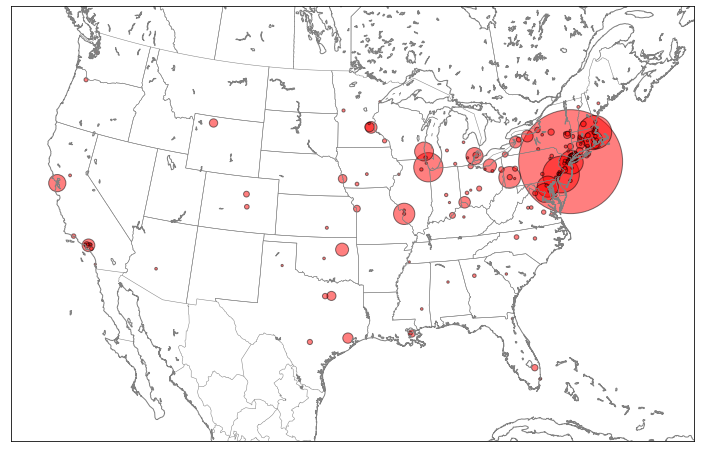

In [6]:
fig = plt.figure(figsize=(15,8))

m = Basemap(
    projection='lcc', 
    resolution='i',
    lat_0=38,
    lon_0=-95,
    width=5.5E6,
    height=3.5E6
)

m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(
    buyer_locs_us['lon'], 
    buyer_locs_us['lat'], 
    s=buyer_locs_us['count'], 
    latlon=True,
    c='red',
    edgecolors='black',
    alpha=0.5);

Zero surprises here, I suppose. Although it is interesting to have the geospatial representation and to see the thick East Coast cluster of buyers. Let's zoom in a bit and narrow our query to cities with fewer than 10,000 Knoedler buyers (to exclude NYC) and more than, say, 10.

In [7]:
mask = (buyer_locs_us['count'] > 10) & (buyer_locs_us['count'] < 10000)

buyer_locs_us[mask]

,city,count,lat,lon
1,"Philadelphia, PA, USA",1347,39.9527237,-75.1635262
2,"Boston, MA, USA",1132,42.3554334,-71.060511
3,"Chicago, IL, USA",859,41.8755616,-87.6244212
4,"Brooklyn, NY, USA",559,40.6526006,-73.9497211
5,"Pittsburgh, PA, USA",473,40.4416941,-79.9900861
...,...,...,...,...
110,"Aurora, IL, USA",11,41.7571701,-88.3147539
111,"Indianapolis, IN, USA",11,39.7683331,-86.1583502
112,"Portsmouth, NH, USA",11,43.0702223,-70.7548621
113,"Seattle, WA, USA",11,47.6038321,-122.3300624


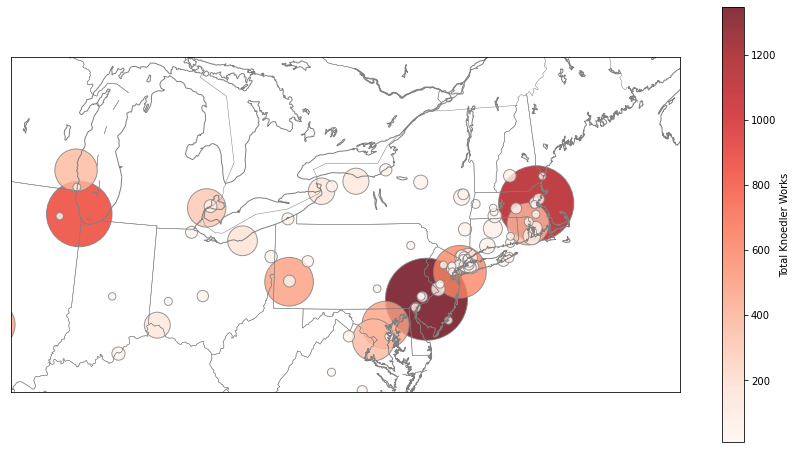

In [8]:
fig = plt.figure(figsize=(15,8))

m = Basemap(
    projection='lcc', 
    resolution='i',
    lat_0=42,
    lon_0=-78,
    width=2E6,
    height=1E6
)

m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(
    buyer_locs_us[mask]['lon'], 
    buyer_locs_us[mask]['lat'], 
    c=buyer_locs_us[mask]['count'],
    latlon=True,
    cmap='Reds',
    s=buyer_locs_us[mask]['count']*5, # For visibility
    alpha=0.8,
    edgecolor='gray'
)

plt.colorbar(label='Total Knoedler Works');

All in all, not a wealth of brand new information here. It is interesting to the clustering of smaller locations around big cities like New York City, Philadelphia, and Boston, which, if anything, suggests an even more dramatic skew towards these major metropolitan areas.